# I love LSD

## Create a structured pattern in noise

In [127]:
nb_syn, noise_density, simtime, t_true = 50, 1e-4, 2e3, 1e3
T=150

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k = 4):
    return A*norm(np.cos(np.linspace(0,k*np.pi,N_inputs)+theta))

def linear(N_inputs, A, theta):
    return np.linspace(0,A,N_inputs)

def make_input(nb_syn, noise_density, simtime, T, t_true, theta = 0, function=cospattern, seed=None):
    np.random.seed(seed)
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    N_noise = int(noise_density*simtime*nb_syn)
    adress_noise = np.random.randint(0, nb_syn, N_noise)
    time_noise = np.random.randint(0, simtime, N_noise)

    # draw stimulus -> stim
    adress_pattern = np.arange(0, nb_syn)
    time_pattern = (function(nb_syn, T, theta) + t_true).astype(int)

    # make address event representation
    time = np.hstack((time_noise, time_pattern))
    addr = np.hstack((adress_noise, adress_pattern))
    sorted_times = np.argsort(time)
    aer = (addr[sorted_times], time[sorted_times])

    return (adress_noise, time_noise), (adress_pattern, time_pattern), aer

def plot_input(aer_noise, aer_pattern):
    adress_noise, time_noise = aer_noise
    adress_pattern, time_pattern = aer_pattern
    fig, ax = plt.subplots(figsize = (13, 8))
    ax.scatter(time_pattern, adress_pattern, color='red');
    ax.scatter(time_noise, adress_noise, color='grey')
    return fig, ax

In [129]:
noise = (np.random.random((nb_syn, int(noise_density*simtime)))*simtime).astype(int)
noise

array([], shape=(50, 0), dtype=int64)

In [130]:
pattern = cospattern(nb_syn, T, theta=0).T
stim = (stimtime + pattern).astype(int)
stim

array([1150, 1147, 1140, 1128, 1113, 1096, 1077, 1058, 1040, 1024, 1012,
       1003, 1000, 1001, 1007, 1017, 1031, 1048, 1067, 1086, 1105, 1121,
       1135, 1144, 1149, 1149, 1144, 1135, 1121, 1105, 1086, 1067, 1048,
       1031, 1017, 1007, 1001, 1000, 1003, 1012, 1024, 1040, 1058, 1077,
       1096, 1113, 1128, 1140, 1147, 1150])

In [131]:

aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)

In [132]:
aer_noise

(array([ 0, 35, 11, 20,  1, 20, 20, 33, 12, 20]),
 array([1585, 1094, 1967,  408,  425,  413,  355,  136, 1712, 1773]))

In [133]:
aer_pattern

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([1150, 1147, 1140, 1128, 1113, 1096, 1077, 1058, 1040, 1024, 1012,
        1003, 1000, 1001, 1007, 1017, 1031, 1048, 1067, 1086, 1105, 1121,
        1135, 1144, 1149, 1149, 1144, 1135, 1121, 1105, 1086, 1067, 1048,
        1031, 1017, 1007, 1001, 1000, 1003, 1012, 1024, 1040, 1058, 1077,
        1096, 1113, 1128, 1140, 1147, 1150]))

In [134]:
aer_pattern[1].min()

1000

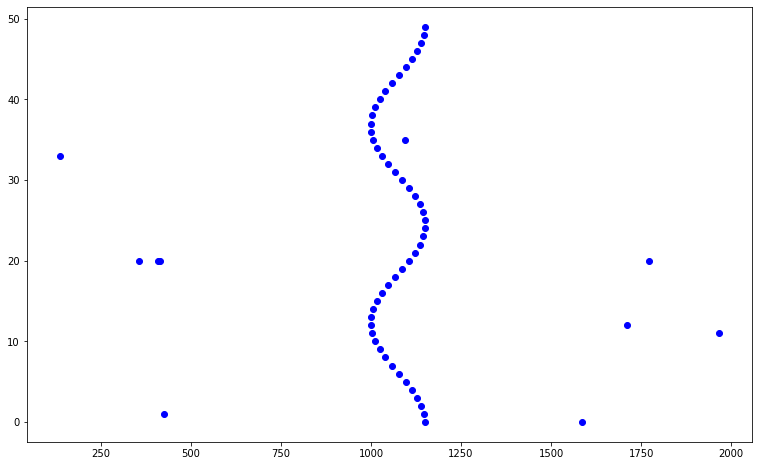

In [135]:
address, timestamp = aer
fig, ax = plt.subplots(figsize = (13, 8))
ax.scatter(timestamp, address, color='blue');

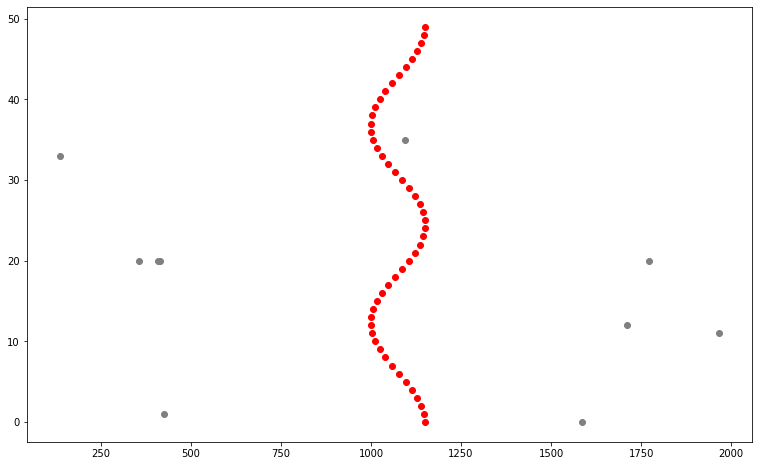

In [136]:
fig, ax = plot_input(aer_noise, aer_pattern)

In [139]:
t_true = aer_pattern[1].min()
t_true

1000

## Supervised STDP learning rule

In [140]:
address

array([33, 20, 20, 20,  1, 12, 37, 36, 13, 38, 11, 35, 14, 10, 39, 15, 34,
        9, 40, 16, 33, 41,  8, 32, 17,  7, 42, 31, 18, 43,  6, 30, 19, 35,
       44,  5, 20, 29, 45,  4, 21, 28,  3, 46, 27, 22,  2, 47, 26, 23, 48,
        1, 25, 24, 49,  0,  0, 12, 20, 11])

In [141]:
delays = np.random.randint(0, 100, nb_syn).astype(float)

In [142]:
delays[address]

array([94., 75., 75., 75., 87., 46., 77., 16., 90., 26., 96., 87., 99.,
       71., 99., 92., 41., 72., 98.,  4., 94., 62.,  0., 43., 79., 37.,
       42., 53.,  4., 35., 49., 66., 30., 87., 51., 29., 75., 59., 11.,
       39., 71., 49., 25.,  2., 57., 84., 39., 82., 33., 68., 38., 87.,
       14., 61., 52., 89., 89., 46., 75., 96.])

In [143]:
timestamp

array([ 136,  355,  408,  413,  425, 1000, 1000, 1001, 1001, 1003, 1003,
       1007, 1007, 1012, 1012, 1017, 1017, 1024, 1024, 1031, 1031, 1040,
       1040, 1048, 1048, 1058, 1058, 1067, 1067, 1077, 1077, 1086, 1086,
       1094, 1096, 1096, 1105, 1105, 1113, 1113, 1121, 1121, 1128, 1128,
       1135, 1135, 1140, 1140, 1144, 1144, 1147, 1147, 1149, 1149, 1150,
       1150, 1585, 1712, 1773, 1967])

In [144]:
T = 100 # duration of a stimulus

class SD_neuron(object):
    """
    Synchrony detector neuron
    
    """
    def __init__(self, nb_syn, T=T,  tau=50, weight=.03):
        self.delays = np.random.randint(0, T, nb_syn).astype(float)
        self.tau = tau # membrane time constant
        self.weight = weight # integration weight

    def code(self, stream):

        address, timestamp = stream

        delayed_timestamp = timestamp + self.delays[address]

        sorted_ind_times = np.argsort(delayed_timestamp)

        V_old, t_old = 0., 0. # initial membrane potential
        V = []
        times = []
        for i_time in sorted_ind_times:
            time = delayed_timestamp[i_time]
            V_new = V_old + self.weight * np.exp(-(time-t_old)/self.tau )
            V.append(V_new)
            times.append(time)
            V_old = V_new
            t_old = time

        return np.array(times), np.array(V)


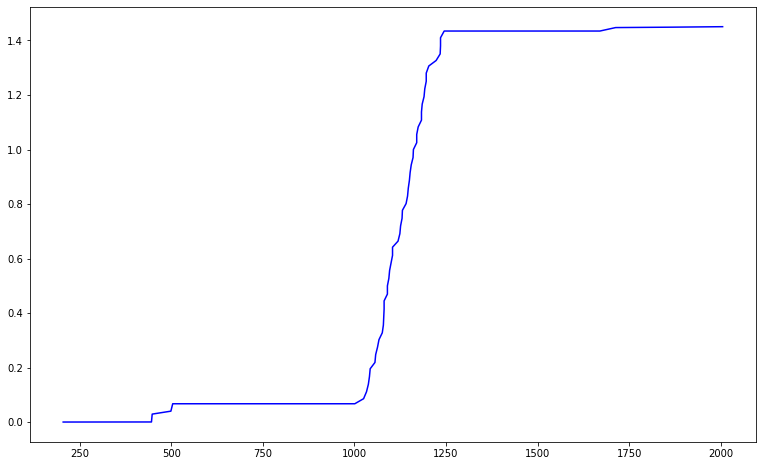

In [145]:
N = SD_neuron(nb_syn)

sorted_times, V = N.code(aer)
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(sorted_times, V, color='blue');

In [146]:
V

array([4.97180262e-04, 7.39183876e-04, 2.95628671e-02, 4.03807153e-02,
       6.75258378e-02, 6.75272840e-02, 8.60907858e-02, 1.11655099e-01,
       1.38800222e-01, 1.67053158e-01, 1.95876841e-01, 2.19008389e-01,
       2.47832072e-01, 2.74977194e-01, 3.02670685e-01, 3.27728791e-01,
       3.55981727e-01, 3.85387687e-01, 4.14793648e-01, 4.44793648e-01,
       4.69851754e-01, 4.99851754e-01, 5.27545244e-01, 5.56368928e-01,
       5.84062418e-01, 6.11755908e-01, 6.41755908e-01, 6.63980455e-01,
       6.91125577e-01, 7.19949261e-01, 7.47642751e-01, 7.77048711e-01,
       8.01610634e-01, 8.29304124e-01, 8.58127807e-01, 8.86380743e-01,
       9.15204427e-01, 9.43457363e-01, 9.70602485e-01, 1.00000845e+00,
       1.02506655e+00, 1.05506655e+00, 1.08276004e+00, 1.10781815e+00,
       1.13781815e+00, 1.16664183e+00, 1.19378695e+00, 1.22261064e+00,
       1.25030413e+00, 1.28030413e+00, 1.30638487e+00, 1.32649448e+00,
       1.35057004e+00, 1.37997600e+00, 1.40997600e+00, 1.43453792e+00,
      

In [147]:
V>1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [148]:
np.argmax(V>1)

39

In [149]:
t_out = sorted_times[np.argmax(V>1)]
t_out

1161.0

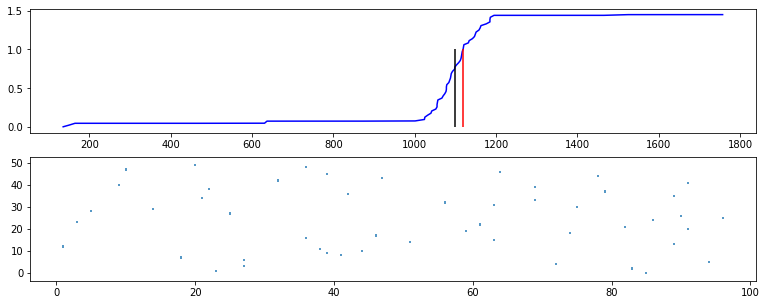

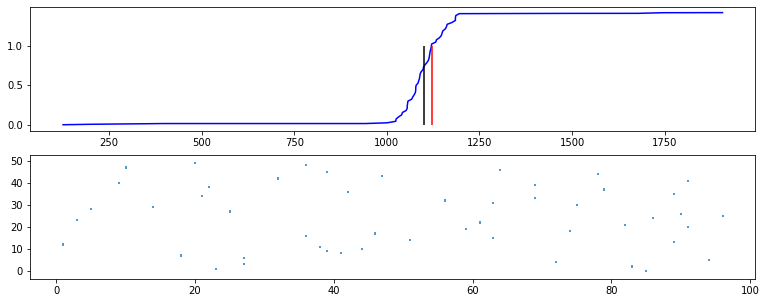

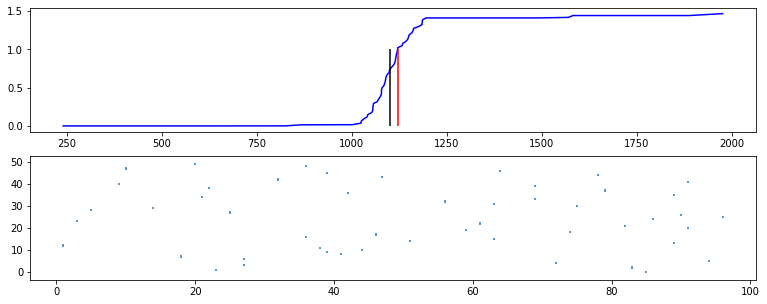

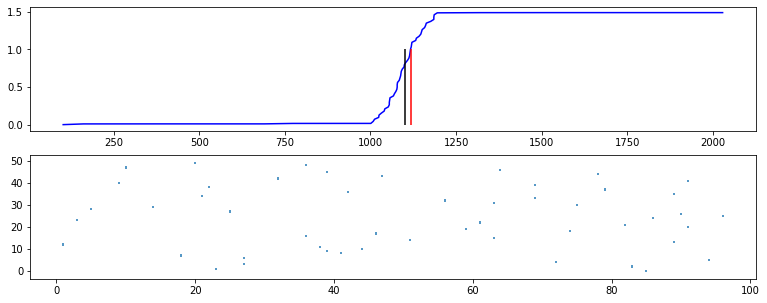

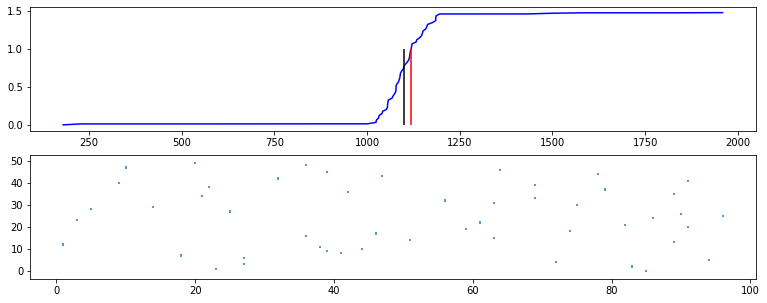

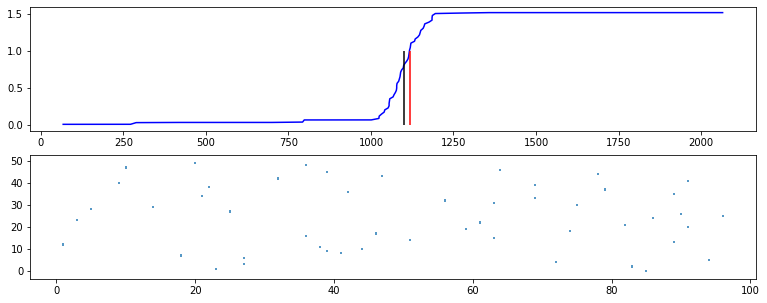

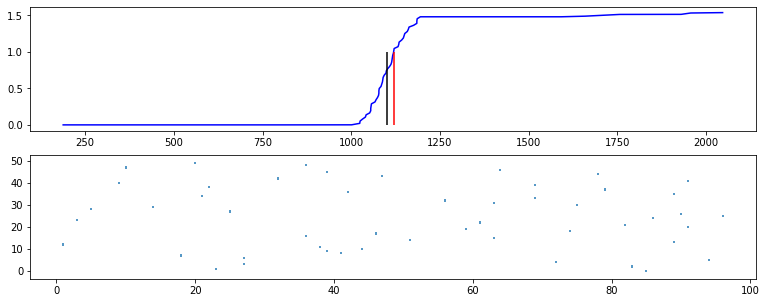

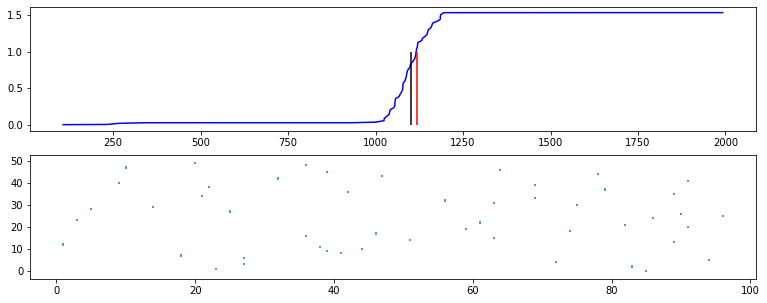

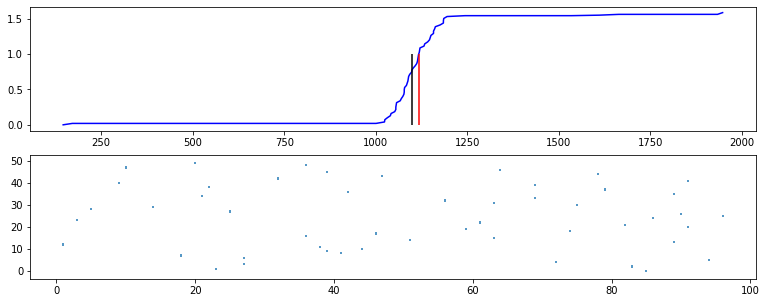

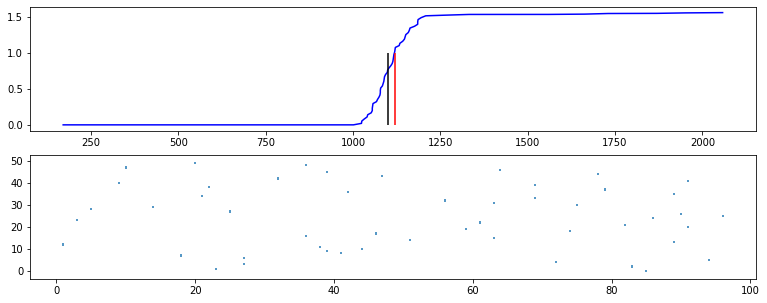

In [151]:

Dweight0 = 1e-2
Ddelay0 = 1e-2
N_epochs = 10

for i_epoch in range(N_epochs):
    aer_noise, aer_pattern, aer = make_input(nb_syn, noise_density, simtime, T, t_true)
    sorted_times, V = N.code(aer)

    # STDP rule on the weights
    if V.max() < 1: # does not spike : the weight is too low
        Dweight = Dweight0
    else:
        t_out = sorted_times[np.argmax(V>1)]
        time_error = stimtime # negative= too early, positive = too late
        Dweight = Dweight0 * np.tanh( time_error / N.tau )
        
    # STDP rule on the weights
    if V.max() > 1: # does not spike : no learning on delays
        t_out = sorted_times[np.argmax(V>1)] # output spike
        #print(sorted_times)
        Ddelay = Ddelay0 * np.tanh( time_error / N.tau )

    N.weight *= 1 + Dweight

    fig, axs = plt.subplots(2, 1, figsize = (13, 5))
    axs[0].plot(sorted_times, V, color='blue');
    axs[0].vlines([stimtime+T], 0, 1, color='black');
    if V.max() > 1: axs[0].vlines([t_out], 0, 1, color='red');
    axs[1].eventplot(N.delays[:,np.newaxis]);
    plt.show()